## Name: Sachin Kumar Manjhi
### Question 5: RFM Analysis

### a)Calculate the RFM values for each customer (by customer id)

#### -For Recency calculation, use 12/2011 as current month. So, the Recency should be how many months before he or she has made a purchase from the current date. If made a purchase in December, then the values should be 0 and so on so forth.
#### -Frequency – At an average how often each customer make purchases in a month.
#### -Monetary Value – Total Spend by the customers in the whole year.

In [7]:
import pandas as pd
import numpy as np

#clustering and dendrograms
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#date time functions
import datetime as dt
from dateutil import relativedelta
from sklearn.preprocessing import StandardScaler

#Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline   

In [8]:
onlineRetail_actual = pd.read_excel("Online Retail.xlsx")
onlineRetail_actual.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Add column for total revenue
onlineRetail_actual['Revenue'] = onlineRetail_actual['Quantity'] * onlineRetail_actual['UnitPrice']

In [10]:
onlineRetail_actual.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
Revenue        541909
dtype: int64

In [11]:
#Check for missing values
null_counts = onlineRetail_actual.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

CustomerID     135080
Description      1454
dtype: int64

In [12]:
#Only take rows where there is CustomerID
onlineRetail = onlineRetail_actual[np.isfinite(onlineRetail_actual['CustomerID'])]
onlineRetail.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
Revenue        406829
dtype: int64

In [13]:
## Remove records where Revenue is -ve: 
onlineRetail = onlineRetail[onlineRetail.Revenue >= 0]
onlineRetail.count()

InvoiceNo      397924
StockCode      397924
Description    397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
Revenue        397924
dtype: int64

In [15]:
onlineRetail['InvoiceDate'] =  pd.to_datetime(onlineRetail['InvoiceDate'], format='%d-%m-%Y')#.dt.strftime()
onlineRetail['InvoiceMonth'] = pd.to_datetime(onlineRetail['InvoiceDate']).dt.strftime('%m/%Y')
onlineRetail['InvoiceMonthOnly']= onlineRetail.InvoiceDate.dt.to_period('M')
onlineRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceMonthOnly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12/2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12/2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/2010,2010-12


In [16]:
onlineRetail['CustomerID'] = onlineRetail['CustomerID'].astype(int)

In [17]:
# Calculated the R,F, M Values
MonetaryVal_df = onlineRetail.groupby('CustomerID',as_index=False)['Revenue'].sum().rename(columns={'Revenue' : 'MonetaryVal'})
MonetaryVal_df.head(3)

,CustomerID,MonetaryVal
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24


In [18]:
# Function to calculate difference between 2 dates in months
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month


In [19]:
#Recency
Recency_df = onlineRetail.groupby('CustomerID', as_index=False)['InvoiceDate'].max().rename(columns={'InvoiceDate' : 'LastPurchase'})
Recency_df['Recency'] = Recency_df.apply(lambda row: diff_month(dt.date(2011,12,1), row['LastPurchase']), axis=1)
Recency_df.head()

,CustomerID,LastPurchase,Recency
0,12346,2011-01-18 10:01:00,11
1,12347,2011-12-07 15:52:00,0
2,12348,2011-09-25 13:13:00,3
3,12349,2011-11-21 09:51:00,1
4,12350,2011-02-02 16:01:00,10


In [20]:
#Frequency 
Frequency_df = onlineRetail.groupby('CustomerID',as_index=False).agg({'InvoiceNo': lambda x: len(x.unique())}).rename(columns={'InvoiceNo': 'Frequency'})
Frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [21]:
# Merge Recency, Frequency and Monetary metrics
FM = pd.merge(Frequency_df, MonetaryVal_df, on='CustomerID')
RFM = pd.merge(Recency_df,FM, on='CustomerID')
RFM = RFM.set_index('CustomerID')
RFM.head()

,LastPurchase,Recency,Frequency,MonetaryVal
CustomerID,,,,
12346,2011-01-18 10:01:00,11,1,77183.60
12347,2011-12-07 15:52:00,0,7,4310.00
12348,2011-09-25 13:13:00,3,4,1797.24
12349,2011-11-21 09:51:00,1,1,1757.55
12350,2011-02-02 16:01:00,10,1,334.40


### b) Find top 10 customers based on frequency and monetary value. Sort them based on first frequency and then monetary value. 

In [26]:
RFM.sort_values(by=['Frequency','MonetaryVal'], ascending=False).head(10)

,LastPurchase,Recency,Frequency,MonetaryVal
CustomerID,,,,
12748,2011-12-09 12:20:00,0,210,33719.73
14911,2011-12-08 15:54:00,0,201,143825.06
17841,2011-12-08 12:07:00,0,124,40991.57
13089,2011-12-07 09:02:00,0,97,58825.83
14606,2011-12-08 19:28:00,0,93,12156.65
15311,2011-12-09 12:00:00,0,91,60767.90
12971,2011-12-06 12:20:00,0,86,11189.91
14646,2011-12-08 12:12:00,0,74,280206.02
16029,2011-11-01 10:27:00,1,63,81024.84


In [27]:
#Drop LastPurchase from RFM dataframe
RFM.drop(['LastPurchase'], 1, inplace=True)

In [28]:
# Normalize data for clustering
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM)
RFM_scaled_df = pd.DataFrame(data=RFM_scaled,index=RFM.index,columns=RFM.columns)

### c) Find optimal number of segments using dendogram and elbow method.

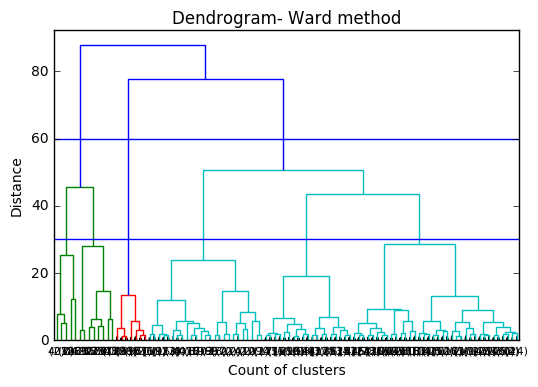

In [29]:
# Wards Method
Z = linkage(RFM_scaled_df,method="ward")
g= dendrogram(Z,truncate_mode='lastp',p=100, leaf_rotation= 0.45,leaf_font_size = 8., show_contracted = True)
plt.title('Dendrogram- Ward method')
plt.xlabel('Count of clusters')
plt.ylabel('Distance')
plt.axhline(y=60)
plt.axhline(y=30)
plt.show()

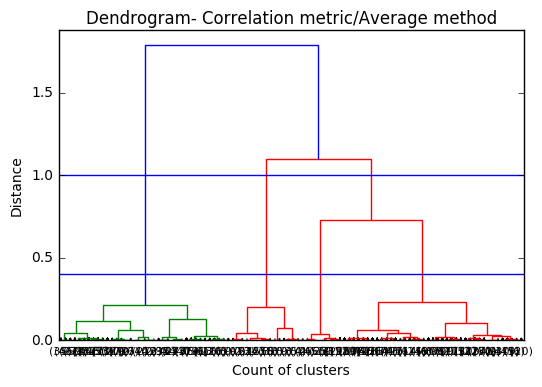

In [32]:
# Correlation Method
Z = linkage(RFM_scaled_df,method="average",metric='correlation')
g= dendrogram(Z,truncate_mode='lastp',p=100, leaf_rotation= 0.45,leaf_font_size = 8., show_contracted = True)
plt.title('Dendrogram- Correlation metric/Average method')
plt.xlabel('Count of clusters')
plt.ylabel('Distance')
plt.axhline(y=0.4)
plt.axhline(y=1)
plt.show()

In [33]:
# Elbow Method
from sklearn.cluster import KMeans
k_range = range( 1, 20 )
cluster_wss = []

for k in k_range:
    clusters = KMeans(k)
    clusters.fit( RFM_scaled_df )
    cluster_wss.append( clusters.inertia_ )

In [34]:
cluster_wss[0:5]

[13017.0,
 9010.9620456711455,
 5465.8604996410322,
 4131.5382330106659,
 3149.8384490799808]

In [36]:
clusters_df = pd.DataFrame( {"Cluster_WSS": cluster_wss, "K":k_range } )
clusters_df.head()

,Cluster_WSS,K
0,13017.000000,1
1,9010.962046,2
2,5465.860500,3
3,4131.538233,4
4,3149.838449,5


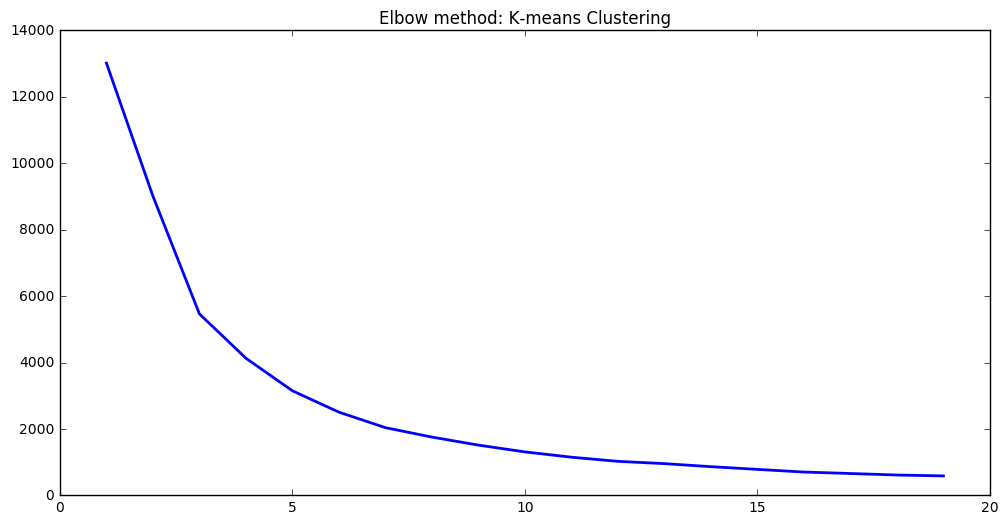

In [37]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df['K'], clusters_df['Cluster_WSS'],linewidth=2)
plt.title('Elbow method: K-means Clustering')

### There is an elbow at K = 3. Hence optimal number of clusters is 3.

In [38]:
## using the output of the elbow method as 3
clusters = KMeans(3,verbose = 0)
clusters.fit( RFM_scaled_df )
RFM_scaled_df ['cluster_id'] = clusters.labels_

In [39]:
# Merge the cluster infor with original data to get insights
RFM_final_df= RFM_scaled_df.merge(RFM,left_index=True,right_index=True,suffixes=["_scaled",""])
RFM_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 12346 to 18287
Data columns (total 7 columns):
Recency_scaled        4339 non-null float64
Frequency_scaled      4339 non-null float64
MonetaryVal_scaled    4339 non-null float64
cluster_id            4339 non-null int32
Recency               4339 non-null int64
Frequency             4339 non-null int64
MonetaryVal           4339 non-null float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 254.2 KB


## e)Explain each segment intuitively. 

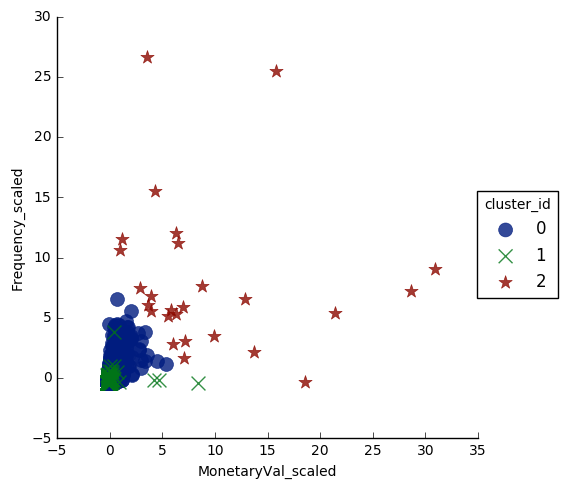

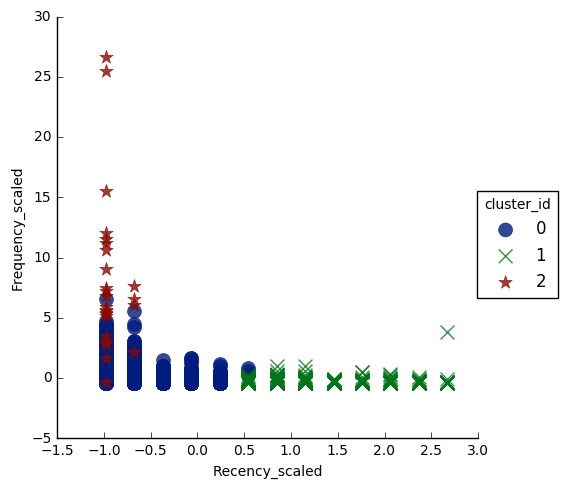

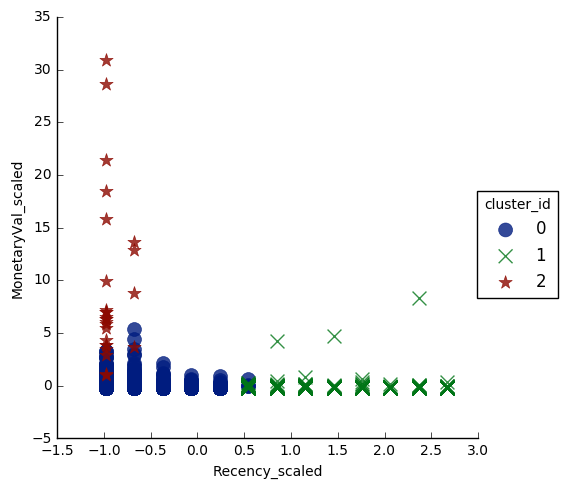

In [40]:
sn.lmplot( x="MonetaryVal_scaled", y="Frequency_scaled", data=RFM_final_df, 
           fit_reg=False, hue='cluster_id',palette="dark", markers=["o", "x","*"],
           legend=True,scatter_kws={"s": 100})

sn.lmplot( x="Recency_scaled", y="Frequency_scaled", data=RFM_final_df, 
           fit_reg=False, hue='cluster_id',palette="dark", markers=["o", "x","*"],
           legend=True,scatter_kws={"s": 100})

sn.lmplot( x="Recency_scaled", y="MonetaryVal_scaled", data=RFM_final_df, 
           fit_reg=False, hue='cluster_id',palette="dark", markers=["o", "x","*"],
           legend=True,scatter_kws={"s": 100})

### Cluster 0: Customers who shopped long ago and have low monetary value
### Cluster 1: Customer who purchased frequently but have low monetary Value, and lower purchase frequency 
### Cluster 2: Customer who purchase frequently ago and have high monetary value and purchase frequency